In [112]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import cv2
import glob
import os

In [0]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('/content/gdrive/My Drive/cv-4/camera_calibration_chess/*.png')

In [115]:
images

['/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1591.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1593.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1608.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1594.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1609.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1604.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1610.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1611.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1605.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1607.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1606.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1602.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1603.png',
 '/content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_158

In [0]:
img = cv2.imread(images[1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
def cv_imshow(img):
  plt.imshow(img, cmap='gray')

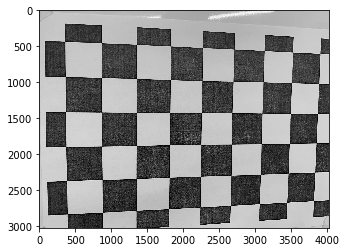

In [119]:
cv_imshow(gray)

In [0]:
chess_grid_size = (6, 9)

In [0]:
ret, corners = cv2.findChessboardCorners(gray, chess_grid_size, None)

In [122]:
corners is not None

True

In [0]:
class CalibrationChessBoard:
  
    def __init__(self, chess_grid_size=(6, 9)):
        """
        
        chess_grid_size - 
        """
      
        self.criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

        self.objp = np.zeros((chess_grid_size[0] * chess_grid_size[1], 3), np.float32)

        self.objp[:, :2] = np.mgrid[0:chess_grid_size[0], 0:chess_grid_size[1]].T.reshape(-1,2)
        
        self.chess_grid_size = chess_grid_size
        
        
        self.obj_points = [] # 3d point
        self.img_points = [] # 2d points
        self.mtx = None
        
    def run(self, images_path, first_n=10):
        """
        images_path - '/content/gdrive/My Drive/cv-4/camera_calibration_chess/*.png'
        """
        images_corners = []
        
        images = glob.glob(images_path)
        for ix, fname in enumerate(images):
            if ix > first_n:
                break
                
            img = cv2.imread(fname)
            
            print(img.shape[:2])
            print('Shape')
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Find the chess board corners
            ret, corners = cv2.findChessboardCorners(gray, chess_grid_size, None)

            print('corners was found for file: {}'.format(fname))
            if ret:
                self.obj_points.append(self.objp)
                
                corners_2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), self.criteria)
                self.img_points.append(corners)
                # Draw and display the corners
                img_corners = cv2.drawChessboardCorners(img, self.chess_grid_size, corners_2, ret)
                images_corners.append(img_corners)
                
        for _ in images_corners:
            cv_imshow(_)
            plt.show()
                
    def calibrate(self):
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(self.obj_points,
                                                           self.img_points,
                                                           (3024, 4032), None, None)
        
        self.mtx = mtx
        self.dist = dist
        
    
    def undistort_img(self, img_path):
        img = cv2.imread(img_path)
        h,  w = img.shape[:2]
        newcameramtx, roi = cv2.getOptimalNewCameraMatrix(self.mtx, self.dist, (w, h), 1, (w, h))

        dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
        x, y, w, h = roi
        dst = dst[y:y+h, x:x+w]
        
        return dst

(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1591.png
(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1593.png
(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1608.png
(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1594.png
(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1609.png
(3024, 4032)
Shape
corners was found for file: /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1604.png


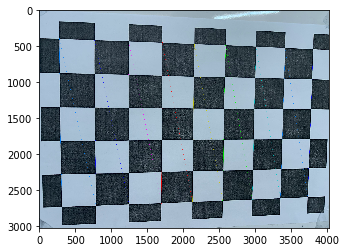

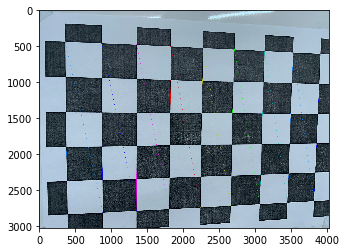

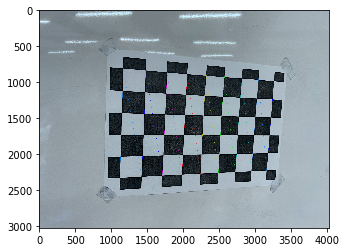

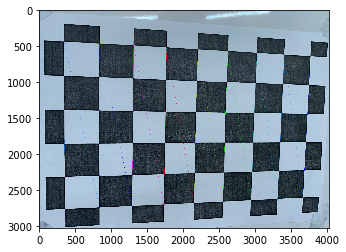

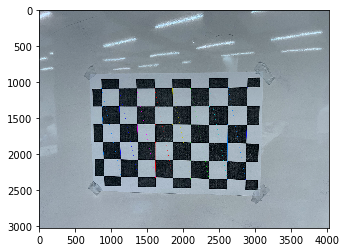

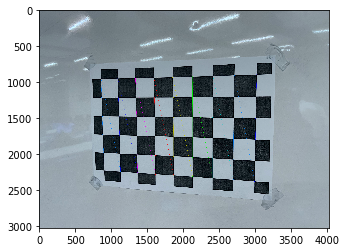

In [124]:
images_dir = '/content/gdrive/My Drive/cv-4/camera_calibration_chess/*.png'


calibration = CalibrationChessBoard()
first_n = 5
calibration.run(images_dir, first_n=first_n)


In [125]:
images = glob.glob(images_dir)
first_image_fname = images[0]
first_image = cv2.imread(first_image_fname)
image_shape = first_image.shape[2:]
print(image_shape)

calibration.calibrate()

undistorted_images = []

for ix, fname in enumerate(images):
    if ix > first_n:
        break
    print('Undistorting image {}'.format(fname))
    undistorted = calibration.undistort_img(fname)
    undistorted_images.append(undistorted)

(3,)
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1591.png
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1593.png
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1608.png
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1594.png
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1609.png
Undistorting image /content/gdrive/My Drive/cv-4/camera_calibration_chess/IMG_1604.png


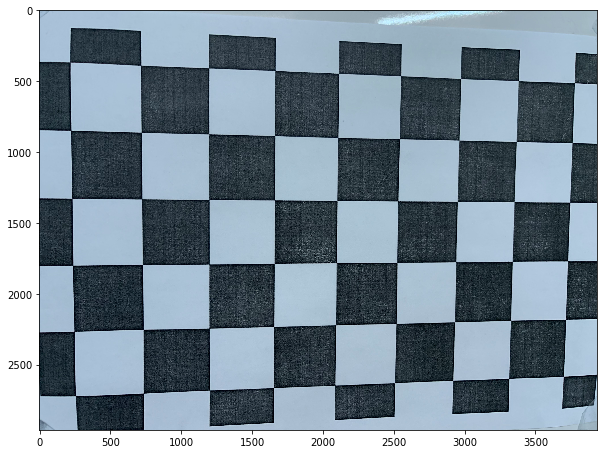

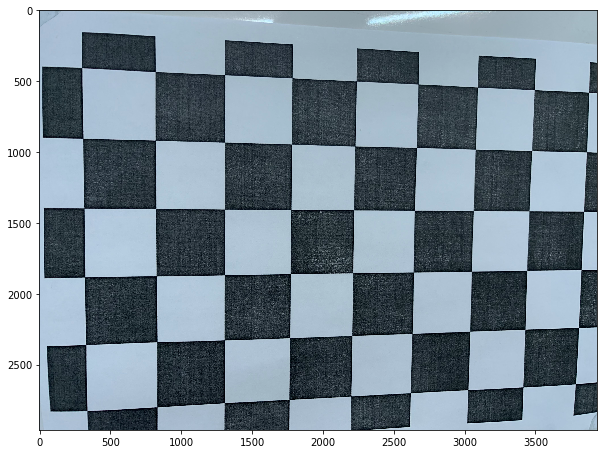

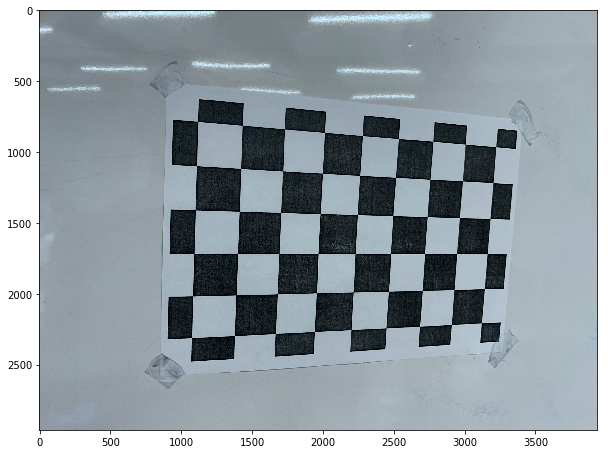

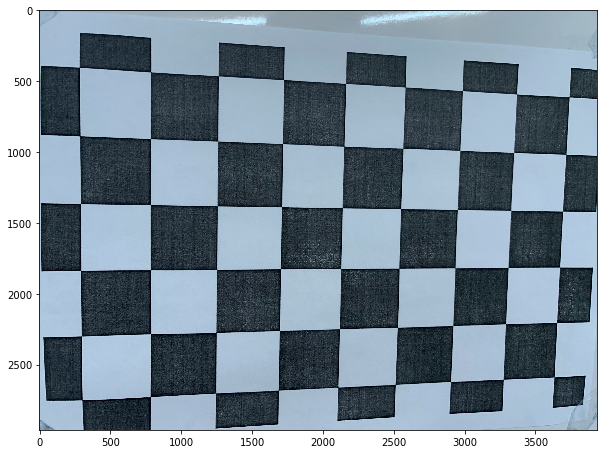

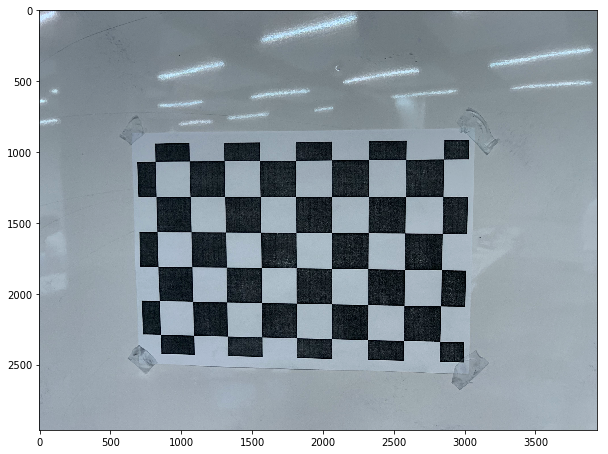

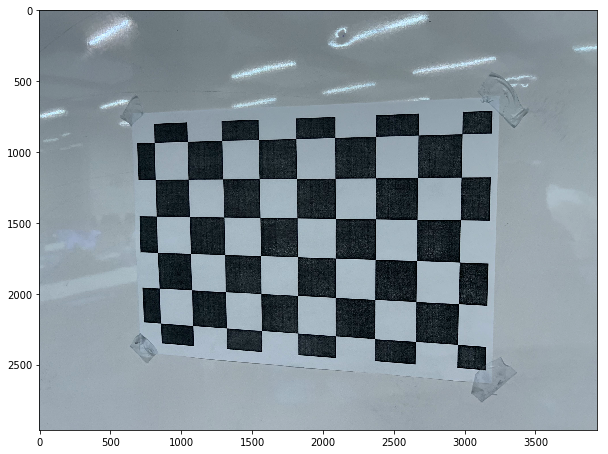

In [126]:
for _ in undistorted_images:
  plt.figure(figsize=(10, 15))
  cv_imshow(_)
  plt.show()